# Section 1: Introduction
In this notebook, we perform some initial exploratory analysis on the two movement datasets provided for each participant in the study. The driving question is the following:

*What is the best way to extract the data provided by the QSAccess app and what initial insights are we able to gain into the data that will be useful for later analysis?*

**The data analysis presented is extracted from work done by Serena, Stanley, Martin, William, Benjamin and Jeremy.**

**This notebook was complied, annoted and double-checked by William**

### Section 1.1: Initialising the Datasets
In this section, we are initialising the datasets in preparation for subsequent cleaning and exploratory data analysis.

Below, we are importing relevant packages and reading in the user data.

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [239]:
user1_raw_data = pd.read_csv("data/User1.csv")
user2_raw_data = pd.read_csv("data/User2.csv")

### Section 1.2: Initial Review of the Datasets
The overarching goal of this part is to explore the intricacies of these two datasets, highlighting any caveats or potential issues, and mark any ideas for feature engineering. This will be further explained in Section 1.3

#### User 1
We print the dataframe and info for the User1 data to get an idea for what the structure of the data looks like.

In [240]:
user1_raw_data.head(10)

,Start,Finish,Steps (count)
0,07-Dec-2014 09:00,07-Dec-2014 10:00,941.0
1,07-Dec-2014 10:00,07-Dec-2014 11:00,408.0
2,07-Dec-2014 11:00,07-Dec-2014 12:00,157.0
3,07-Dec-2014 12:00,07-Dec-2014 13:00,1017.0
4,07-Dec-2014 13:00,07-Dec-2014 14:00,0.0
5,07-Dec-2014 14:00,07-Dec-2014 15:00,0.0
6,07-Dec-2014 15:00,07-Dec-2014 16:00,137.0
7,07-Dec-2014 16:00,07-Dec-2014 17:00,0.0
8,07-Dec-2014 17:00,07-Dec-2014 18:00,33.0
9,07-Dec-2014 18:00,07-Dec-2014 19:00,0.0


We are looking to see the number of rows, and the dtype of each column

In [241]:
user1_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42076 entries, 0 to 42075
Data columns (total 3 columns):
Start            42076 non-null object
Finish           42076 non-null object
Steps (count)    42076 non-null float64
dtypes: float64(1), object(2)
memory usage: 986.2+ KB


We are looking to see the number of missing values if any, and prepare the data for cleaning. **There are no missing values**

In [242]:
user1_raw_data.isnull().sum()

Start            0
Finish           0
Steps (count)    0
dtype: int64

The timestamps are currently parsed in as strings, so we need to convert them to datetimes first. 

We convert strings in our start and finish columns to datetime

In [243]:
user1_df = user1_raw_data.copy()
user1_df['Start'] = pd.to_datetime(user1_df['Start'], format='%d-%b-%Y %H:%M')
user1_df['Finish'] = pd.to_datetime(user1_df['Finish'], format='%d-%b-%Y %H:%M')

We run a describe to get a feel for hourly step count.

In [244]:
user1_df.describe()

,Steps (count)
count,42076.000000
mean,203.142842
std,517.158855
min,0.000000
25%,0.000000
50%,0.000000
75%,122.855812
max,7204.611321


Observation of interesting insights:
- 42076 rows of data
- Average step count is 203.14 steps per hour
- Standard Deviation is 517.16 steps per hour
- Range of steps per hour goes from 0 to 7204.61, with 25% of data lying above 122

We run a describe to get a feel for start and finish

In [245]:
user1_df[['Start', 'Finish']].describe()

,Start,Finish
count,42076,42076
unique,42071,42071
top,2018-04-01 02:00:00,2018-04-01 02:00:00
freq,2,2
first,2014-12-07 09:00:00,2014-12-07 10:00:00
last,2019-09-25 11:00:00,2019-09-25 12:00:00


We note the duplicate time stamps within this dataset and run code to find them.

In [246]:
start_counts = user1_df['Start'].value_counts()
multicounts = start_counts[start_counts > 1]
multicounts

2018-04-01 02:00:00    2
2016-04-03 02:00:00    2
2019-04-07 02:00:00    2
2015-04-05 02:00:00    2
2017-04-02 02:00:00    2
Name: Start, dtype: int64

To determine if their are any significance in terms of overall hourly step count, we find the rows which they occur

In [247]:
user1_df[user1_df['Start'].isin(multicounts.index.values)]

,Start,Finish,Steps (count)
2849,2015-04-05 02:00:00,2015-04-05 02:00:00,0.000000
2850,2015-04-05 02:00:00,2015-04-05 03:00:00,0.000000
11585,2016-04-03 02:00:00,2016-04-03 02:00:00,0.000000
11586,2016-04-03 02:00:00,2016-04-03 03:00:00,0.000000
20321,2017-04-02 02:00:00,2017-04-02 02:00:00,0.000000
20322,2017-04-02 02:00:00,2017-04-02 03:00:00,0.000000
29057,2018-04-01 02:00:00,2018-04-01 02:00:00,0.000000
29058,2018-04-01 02:00:00,2018-04-01 03:00:00,0.000000
37961,2019-04-07 02:00:00,2019-04-07 02:00:00,0.067778
37962,2019-04-07 02:00:00,2019-04-07 03:00:00,3.801039


**Initial Conclusion of User 1 Dataset:**

* Structure of the Dataset

There are three columns for each user: two indicating the start and end of the timestamp (which appear to be in one hour increments) and a step count for that hour block. There are 42076 rows, which should cover around 5 years of data (assuming there are no breaks in the hour increments), and no missing values.  

* Insights from Initial Review

The average step count for User 1 is 203 steps per day with a standard deviation of 517 steps. This is a very unreliable measure, however, because 0 step counts account for at least half of all the data set, making this dataset very sparse. The max step count for one hour is 7204, which seems a little high.

On average, it takes around 1500 steps to walk a kilometre, or 1000 to run, so that means the user travelled around 5km in one hour walking, or 7km running. Average human walking speed is around 3km/hour, so this might be an outlier or error that is worth examining closer. 

Observing the start and finish timestamps, one thing stands out: there are duplicate timestamps. `2018-04-01 02:00:00` has two entries in the dataset. External research suggests that the 1st Apr 2018 was the end of Daylight Savings, so 3am was turned back to 2am and resulted in duplicate 2am's.

#### User 2
We print the dataframe and info for the User2 data to get an idea for what the structure of the data looks like.

In [248]:
user2_raw_data.head(10)

,Start,Finish,Steps (count)
0,29-Nov-2014 00:00,29-Nov-2014 01:00,502.666667
1,29-Nov-2014 01:00,29-Nov-2014 02:00,502.666667
2,29-Nov-2014 02:00,29-Nov-2014 03:00,502.666667
3,29-Nov-2014 03:00,29-Nov-2014 04:00,502.666667
4,29-Nov-2014 04:00,29-Nov-2014 05:00,502.666667
5,29-Nov-2014 05:00,29-Nov-2014 06:00,502.666667
6,29-Nov-2014 06:00,29-Nov-2014 07:00,502.666667
7,29-Nov-2014 07:00,29-Nov-2014 08:00,279.333333
8,29-Nov-2014 08:00,29-Nov-2014 09:00,502.666667
9,29-Nov-2014 09:00,29-Nov-2014 10:00,502.666667


We are looking to see the number of rows, and the dtype of each column

In [249]:
user2_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42277 entries, 0 to 42276
Data columns (total 3 columns):
Start            42277 non-null object
Finish           42277 non-null object
Steps (count)    42277 non-null float64
dtypes: float64(1), object(2)
memory usage: 990.9+ KB


We are looking to see the number of missing values if any, and prepare the data for cleaning

In [250]:
user2_raw_data.isnull().sum()

Start            0
Finish           0
Steps (count)    0
dtype: int64

The timestamps are currently parsed in as strings, so we need to convert them to datetimes first. 

We convert strings in our start and finish columns to datetime

In [251]:
user2_df = user2_raw_data.copy()
user2_df['Start'] = pd.to_datetime(user2_df['Start'], format='%d-%b-%Y %H:%M')
user2_df['Finish'] = pd.to_datetime(user2_df['Finish'], format='%d-%b-%Y %H:%M')

We run a describe to get a feel for hourly step count

In [252]:
user2_df.describe()

,Steps (count)
count,42277.000000
mean,415.856608
std,726.063222
min,0.000000
25%,0.000000
50%,177.818774
75%,479.318182
max,7261.816867


Observation of interesting insights:
- 42277 rows of data
- Average step count is 416 steps per hour
- Standard Deviation is 726 steps per hour
- Range of steps per hour goes from 0 to 7261, with 50% of data lying above 177

We run a describe to get a feel for start and finish

In [253]:
user2_df[['Start', 'Finish']].describe()

,Start,Finish
count,42277,42277
unique,42272,42272
top,2016-04-03 02:00:00,2015-04-05 02:00:00
freq,2,2
first,2014-11-29 00:00:00,2014-11-29 01:00:00
last,2019-09-25 11:00:00,2019-09-25 12:00:00


We note the duplicate time stamps within this dataset and run code to find them.

In [254]:
start_counts_2 = user2_df['Start'].value_counts()
multicounts_2 = start_counts_2[start_counts_2 > 1]
multicounts_2

2016-04-03 02:00:00    2
2018-04-01 02:00:00    2
2015-04-05 02:00:00    2
2019-04-07 02:00:00    2
2017-04-02 02:00:00    2
Name: Start, dtype: int64

To determine if their are any significance in terms of overall hourly step count, we find the rows which they occur

In [255]:
user2_df[user2_df['Start'].isin(multicounts_2.index.values)]

,Start,Finish,Steps (count)
3050,2015-04-05 02:00:00,2015-04-05 02:00:00,0.000000
3051,2015-04-05 02:00:00,2015-04-05 03:00:00,0.000000
11786,2016-04-03 02:00:00,2016-04-03 02:00:00,0.000000
11787,2016-04-03 02:00:00,2016-04-03 03:00:00,0.000000
20522,2017-04-02 02:00:00,2017-04-02 02:00:00,265.522745
20523,2017-04-02 02:00:00,2017-04-02 03:00:00,265.522745
29258,2018-04-01 02:00:00,2018-04-01 02:00:00,0.000000
29259,2018-04-01 02:00:00,2018-04-01 03:00:00,0.000000
38162,2019-04-07 02:00:00,2019-04-07 02:00:00,0.000000
38163,2019-04-07 02:00:00,2019-04-07 03:00:00,0.000000


**Initial Conclusion of User 2 Dataset:**

* Structure of the Dataset

There are three columns for each user: two indicating the start and end of the timestamp (which appear to be in one hour increments) and a step count for that hour block. There are 42277 rows, which should cover around 5 years of data (assuming there are no breaks in the hour increments), and no missing values.  

* Insights from Initial Review

One immediate observation from seeing the head is just how much the same step count repeats over multiple hours. While it's not impossible that the user has walked exactly 502.667 steps per hour from 1am to sometime after 5am, it does seem highly improbable. 

One potential explanation for this based on personal observation and experience with the QS App is that step data stored by Apple are recorded in non-binned form, so if the time block takes up more than an hour, they will divide it evenly over the hour increment. So it's possible that their phone recorded a high step count while the person is sleeping, and then spread it evenly across the full timeblock instead of attributing it to a specific hour. 
**This is a behaviour which will definitely intefere with analysis, and will need to be identified and dealt with**

Secondly, the average step count for User 2 is 416 steps per day with a standard deviation of 726 steps. This is a very unreliable measure, however, because 0 step counts account for at least half of all the data set, making this dataset very sparse. The max step count for one hour is 7261, which seems a little high.

On average, it takes around 1500 steps to walk a kilometre, or 1000 to run, so that means the user travelled around 5km in one hour walking, or 7km running. Average human walking speed is around 3km/hour, so this might be an outlier or error that is worth examining closer. 

Observing the start and finish timestamps, one thing stands out: there are duplicate timestamps. `2018-04-01 02:00:00` has two entries in the dataset. External research suggests that the 1st Apr 2018 was the end of Daylight Savings, so 3am was turned back to 2am and resulted in duplicate 2am's.

### Section 2: Data Cleaning

#### User 1 Dataset

As stated in our initial conclusions, we noted some issues that require cleaning:

* Duplicate Times due to Daylight Saving

These duplicate times only occur once a year, and take on the form of 2am-2am. All of these are essentially 0, so we will drop them altogether, as removing some 0's from the sparse dataset won't make a very big difference. 

We create an auto-cleaning function that addresses the duplicate times

In [256]:
def clean_user(raw_df):
    raw_df['Start'] = pd.to_datetime(raw_df['Start'], format='%d-%b-%Y %H:%M')
    raw_df['Finish'] = pd.to_datetime(raw_df['Finish'], format='%d-%b-%Y %H:%M')
    start_counts_3 = raw_df['Start'].value_counts()
    multicounts_3 = start_counts_3[start_counts_3 > 1]
    
    raw_df = raw_df[~ (raw_df['Start'].isin(multicounts_3.index.values) & 
        raw_df['Finish'].isin(multicounts_3.index.values) )]
    
    return raw_df

We run our two datasets through this function

In [257]:
user1_df = clean_user(user1_raw_data)
user2_df = clean_user(user2_raw_data)

We check both datasets to ensure it has cleaned what it was made to do

In [258]:
user1_df[['Start', 'Finish']].describe()

,Start,Finish
count,42071,42071
unique,42071,42071
top,2017-05-31 04:00:00,2017-05-31 04:00:00
freq,1,1
first,2014-12-07 09:00:00,2014-12-07 10:00:00
last,2019-09-25 11:00:00,2019-09-25 12:00:00


In [259]:
user2_df[['Start', 'Finish']].describe()

,Start,Finish
count,42272,42272
unique,42272,42272
top,2017-05-31 04:00:00,2017-05-31 04:00:00
freq,1,1
first,2014-11-29 00:00:00,2014-11-29 01:00:00
last,2019-09-25 11:00:00,2019-09-25 12:00:00


**Yes it does!** 

We have already dealt with the Daylight Savings duplicate time issue in our cleaning function, so thankfully the most frequent date only has a frequency of 1. User 1 dataset has 42071 rows, whilst User 2 dataset has 42272 rows, and both spans around 5 years of data. 


### Section 3: EDA

#### Further Analysis of the Statistical Rigority of our Dataset

* Uncommon Step Counts

There are many zeros in our dataset, especially at odd times. We use a histogram to plot datapoints to see if it follows some sort of distribution.

We notice how our step counts seem to follow a poisson distribution for User 1, especially when ignoring 0's

Text(0.5, 1.0, 'A more informative distplot of the nonzero steps')

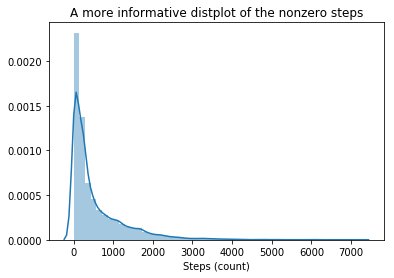

In [260]:
sns.distplot(user1_df[user1_df['Steps (count)'] != 0]['Steps (count)'])
plt.title("A more informative distplot of the nonzero steps")

**But** there is a rather long right tail, which will affect the significance of any hypothesis tests we do that assume parametric data.


This also seems to be the case for User 2

Text(0.5, 1.0, 'Distplot of the nonzero steps - User 2')

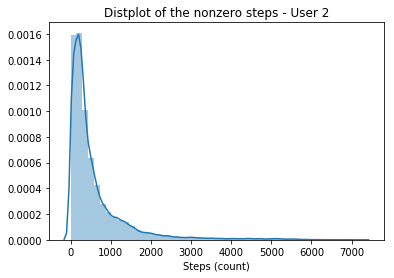

In [261]:
sns.distplot(user2_df[user2_df['Steps (count)'] != 0]['Steps (count)'])
plt.title("Distplot of the nonzero steps - User 2")

We're seeing a trend that user steps will definitely be very right skewed, with most step counts being closer to zero. We may need to use a threshold to indicate the times that a person actually walked, or if it was likely due to random chance or other movements.

*e.g. can picking up your phone be misconstrued as a step?* 

#### Time-Related Data Analysis

Now looking at some time-related breakdowns. We set up the data in preparation to aggregate by:
- year
- month
- week
- day
- day of week
- hour

Using the Start time as the basis for our timestamps makes more sense. 

First, defining some functions for plotting data to make it easier to explore.

In [262]:
def plot_scatterplot(df):
    plt.plot(df.index, df['mean'])
    plt.scatter(df.index, df['mean'])
    plt.ylabel("Average steps")
    plt.xlabel("Time")
    plt.title("Average steps")
    plt.grid()
    plt.show()

Creating a function that will allow us to aggregate easier:

In [263]:
def add_time_features(df):
    df = df.copy()
    df['year'] = df['Start'].dt.year
    df['month'] = df['Start'].dt.month
    df['week'] = df['Start'].dt.strftime("%V") #made a change to Serena's code since .isocalendar()[1] didn't work
    df['day'] = df['Start'].dt.day
    df['dayofweek'] = df['Start'].dt.dayofweek
    df['hour'] = df['Start'].dt.hour
    
    return df

def display_mean_plot(df, mode):
    aggs = df.groupby(mode).agg(steps_aggs)
    aggs.columns = [x[1] for x in aggs.columns]
    
    plot_scatterplot(aggs)

**User 1**

We check if our aggregation function successfully outputs the information we want. 

In [264]:
user1_df = add_time_features(user1_df)
user1_df.head(5)

,Start,Finish,Steps (count),year,month,week,day,dayofweek,hour
0,2014-12-07 09:00:00,2014-12-07 10:00:00,941.0,2014,12,49,7,6,9
1,2014-12-07 10:00:00,2014-12-07 11:00:00,408.0,2014,12,49,7,6,10
2,2014-12-07 11:00:00,2014-12-07 12:00:00,157.0,2014,12,49,7,6,11
3,2014-12-07 12:00:00,2014-12-07 13:00:00,1017.0,2014,12,49,7,6,12
4,2014-12-07 13:00:00,2014-12-07 14:00:00,0.0,2014,12,49,7,6,13


Naming columns so that their purpose is very clear

In [265]:
steps_describe_columns = [('Steps (count)', 'count'), ('Steps (count)',  'mean'), ('Steps (count)',   'std'),
                          ('Steps (count)',   'min'), ('Steps (count)',   '25%'), ('Steps (count)',   '50%'), 
                          ('Steps (count)',   '75%'), ('Steps (count)',   'max')
                        ]

steps_aggs = {'Steps (count)': ['sum', 'mean', 'std', 'min', 'median', 'max', 'count']}

**A** 

Aggregation by Year to see if there are any patterns or trends in step counts

In [266]:
year_aggs = user1_df.groupby("year").agg(steps_aggs)
year_aggs.columns = [x[1] for x in year_aggs.columns]
year_aggs

,sum,mean,std,min,median,max,count
year,,,,,,,
2014,1.115900e+05,188.815567,495.522895,0.0,0.000000,3678.000000,591
2015,1.582732e+06,180.697797,517.354050,0.0,0.000000,6476.569805,8759
2016,1.634559e+06,186.104827,501.083499,0.0,0.000000,6052.441276,8783
2017,1.463320e+06,167.064733,492.293485,0.0,0.000000,6272.645042,8759
2018,1.866431e+06,213.087201,493.942794,0.0,0.000000,7204.611321,8759
2019,1.888807e+06,294.206647,589.012723,0.0,6.702548,5777.462429,6420


A graphical plot of average steps per year

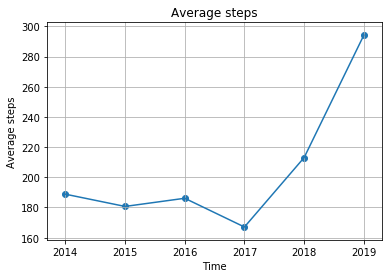

In [267]:
plot_scatterplot(year_aggs)

**Conclusions:**
    
From the summary, we have full year's worth of data for 2015-2018, 691 days for 2014, and 6420 days for 2019. The mean steps taken per hour was highest in 2019, and lowest in 2017. Standard deviation was lowest in 2017, and highest in 2019.

This suggests that User 1 walked more steps on average in 2019, but had more variation in how much they walked per hour, whereas they walked the least steps on average in 2017, but were more consistent in that number. This may also be a function of the fewer data points in 2019.

**B**

Aggregation by Month to see if there are any patterns or trends in step counts

In [268]:
month_aggs = user1_df.groupby("month").agg(steps_aggs)
month_aggs.columns = [x[1] for x in month_aggs.columns]
month_aggs

,sum,mean,std,min,median,max,count
month,,,,,,,
1,744761.114803,200.204601,504.273415,0.0,0.0,6444.000000,3720
2,627560.340006,185.449273,478.116770,0.0,0.0,5241.669732,3384
3,931391.794740,250.374138,566.153040,0.0,0.0,6023.499884,3720
4,875194.491326,243.109581,555.893625,0.0,0.0,6476.569805,3600
5,606693.635922,163.089687,468.775422,0.0,0.0,6195.616054,3720
6,775956.000000,215.543333,574.587724,0.0,0.0,5873.330051,3600
7,921782.000000,247.790860,664.738524,0.0,0.0,6055.166833,3720
8,736871.000000,198.083602,487.165118,0.0,0.0,5214.052265,3720
9,590481.000000,170.265571,463.933524,0.0,0.0,6272.645042,3468


A graphical plot of average steps per month

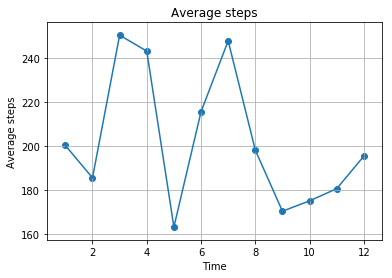

In [269]:
plot_scatterplot(month_aggs)

**Conclusions:**

The average steps per hour aggregated by month seems to suggest certain months have systematically higher levels of walking, such as March, April, and July, and lower levels of walking such as September - November. 

**C**

Aggregation by Week to see if there are any patterns or trends in step counts

In [270]:
week_aggs = user1_df.groupby("week").agg(steps_aggs)
week_aggs.columns = [x[1] for x in week_aggs.columns]
week_aggs.head(5)

,sum,mean,std,min,median,max,count
week,,,,,,,
01,159691.018786,190.108356,470.578745,0.0,0.0,3917.245696,840
02,191406.525689,227.864912,491.638966,0.0,0.0,3866.168899,840
03,151858.652796,180.784110,466.946471,0.0,0.0,4273.000000,840
04,173310.446406,206.321960,573.509584,0.0,0.0,6444.000000,840
05,184310.698686,219.417498,591.571387,0.0,0.0,5241.669732,840


A graphical plot of average steps per week

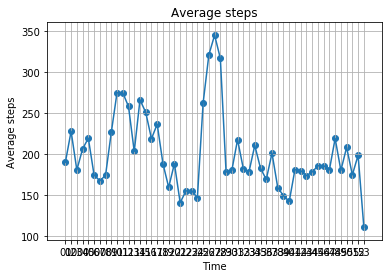

In [271]:
plot_scatterplot(week_aggs)

**Conclusions:**

Breaking the step counts down by week of the year, it looks like certain weeks of the year have higher average step counts per hour (peaking at 350 steps) compared to others (e.g. 150 steps). They seem more varied in the earlier weeks of the year compared to later, and become more stable in later weeks before dropping off. No discernible trends which aren't explained by month already.

**D**

Aggregating by day of week, we use `dayofweek()` where Monday = 0 and Sunday = 6, to see if there are any trends in step count

In [272]:
dow_aggs = user1_df.groupby("dayofweek").agg(steps_aggs)
dow_aggs.columns = [x[1] for x in dow_aggs.columns]
dow_aggs 

,sum,mean,std,min,median,max,count
dayofweek,,,,,,,
0,1.168919e+06,194.043589,509.428204,0.0,0.0,5769.000000,6024
1,1.189750e+06,197.501639,491.770749,0.0,0.0,6272.645042,6024
2,1.299812e+06,216.203003,535.789291,0.0,0.0,6055.166833,6012
3,1.329376e+06,221.562665,530.524977,0.0,0.0,7204.611321,6000
4,1.329018e+06,221.502940,521.759929,0.0,0.0,5423.273163,6000
5,1.046901e+06,174.483537,515.289055,0.0,0.0,6444.000000,6000
6,1.183662e+06,196.916056,513.098491,0.0,0.0,6476.569805,6011


Graphical plotting of steps per day of week

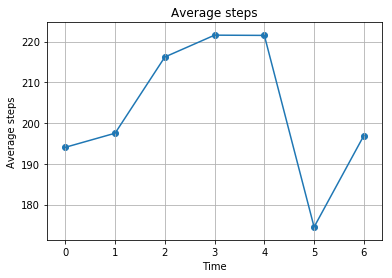

In [273]:
plot_scatterplot(dow_aggs)

**Conclusions:**

From the graph, it certainly seems like User 1 walks increasingly more as the week goes on, and then sharply drops off during the weekend. A potential explanation would be that the user works Mon-Fri, and so remembers to exercise during the workweek, and then stays at home during the weekend. This does give a lot of insight into the habits of the user. 


**E**

Aggregation by hour to see if there are any patterns or trends in step counts

In [274]:
hour_aggs = user1_df.groupby("hour").agg(steps_aggs)
hour_aggs.columns = [x[1] for x in hour_aggs.columns]
hour_aggs.head(5)

,sum,mean,std,min,median,max,count
hour,,,,,,,
0,99191.034272,56.583591,298.144179,0.0,0.0,4112.889022,1753
1,120662.729550,68.832133,362.724302,0.0,0.0,5716.821371,1753
2,113250.652023,64.751659,322.903802,0.0,0.0,6053.737707,1749
3,141353.544622,80.635222,396.392945,0.0,0.0,4838.945689,1753
4,130494.615958,74.440739,356.741978,0.0,0.0,5057.785598,1753


Graphical plotting of average numebr of steps per hour 

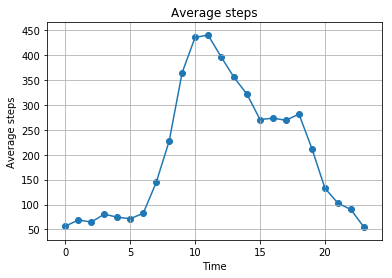

In [275]:
plot_scatterplot(hour_aggs)

**Conclusion**

When we see the hourly breakdown, it becomes clearer what the user's schedule looks like. They wake up sometime around 7am, and steadily increase their wakling until 10am (at 450 steps), and then steadily decrease from there, plateauing from 3pm to 6pm before falling sharply. 

It's also worth noting that step counts hover around 50-100 from the hours of 10pm to 6am, but don't quite dip to zero, suggesting that there may be calibration issues with the step measurements, or that the person genuinely does not sleep. 

**F** 

A graphical representation of aggregation of number of steps taken per hour, segmented by day of week

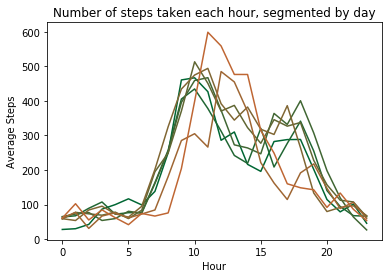

In [276]:
# Changed to reflect the common dataset we will use
day_hour_aggs = user1_df.groupby(["dayofweek","hour"], as_index=False)['Steps (count)'].agg('mean')
day_hour_aggs.columns = ["day of week", "hour", "steps"]
fig, ax = plt.subplots()
for i in range(7):
    daily_count = day_hour_aggs[day_hour_aggs["day of week"] == i]
    ax.plot(daily_count["hour"],daily_count["steps"], color = [1/8 * i,0.4,0.2])

ax.set_xlabel("Hour")
ax.set_ylabel("Average Steps")
ax.set_title("Number of steps taken each hour, segmented by day")
plt.show()

**Conclusion**

We notice how there seems to be a consistent trend in step data, where it is bimodal in nature at specific times. Namely, from 7am to 12pm, and from 3pm to 8pm. 

**User 2**

We check if our aggregation function successfully outputs the information we want.

In [277]:
user2_df = add_time_features(user2_df)
user2_df.head(5)

,Start,Finish,Steps (count),year,month,week,day,dayofweek,hour
0,2014-11-29 00:00:00,2014-11-29 01:00:00,502.666667,2014,11,48,29,5,0
1,2014-11-29 01:00:00,2014-11-29 02:00:00,502.666667,2014,11,48,29,5,1
2,2014-11-29 02:00:00,2014-11-29 03:00:00,502.666667,2014,11,48,29,5,2
3,2014-11-29 03:00:00,2014-11-29 04:00:00,502.666667,2014,11,48,29,5,3
4,2014-11-29 04:00:00,2014-11-29 05:00:00,502.666667,2014,11,48,29,5,4


**A** 

A graphical represention of aggregation by Year to see if there are any patterns or trends in step counts

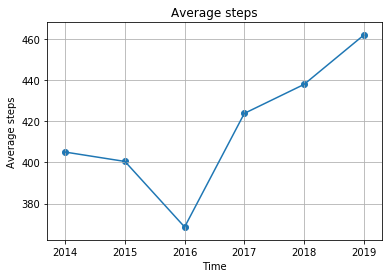

In [278]:
display_mean_plot(user2_df, 'year')

**Conclusions:**
    
This user has a slightly different pattern: their average step count aggregated over the year almost steadily climbs up every year, with a very low dip in 2016 where they didn't walk much - though it's possible this is due to a lack of use/records rather than a lack of steps. 

**B**

A graphical representation of aggregation by Month to see if there are any patterns or trends in step counts

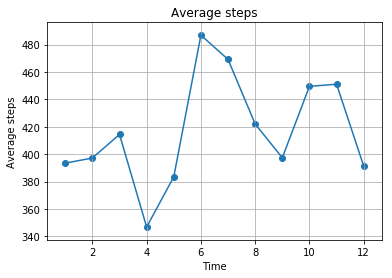

In [279]:
display_mean_plot(user2_df, 'month')

**Conclusions:**

Aggregating by month, we also see a spike in step count around June and July. If we had more knowledge on the users, perhaps this could be attributed to school holidays, and hence more opportunity for walking during vacation/break. 

**C**

A graphical representation of aggregation by Week to see if there are any patterns or trends in step counts

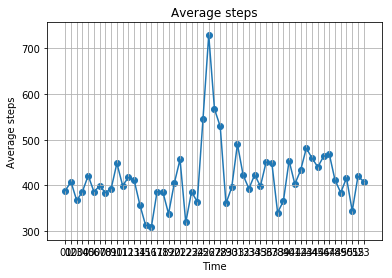

In [280]:
display_mean_plot(user2_df, 'week')

**Conclusions:**

As we're doing these graphs, it becomes apparent that we have very little knowledge of the user themselves, and hence what could be possible reasons for the data that we see. There's a very clear spike around week 26, which happens to be exactly in the middle of the year, but otherwise the steps also trend upwards as the year progresses. 

**D**

A graphical represention of aggregating by day of week, where we use `dayofweek()` where Monday = 0 and Sunday = 6, to see if there are any trends in step count

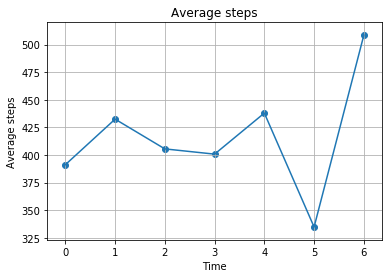

In [281]:
display_mean_plot(user2_df, 'dayofweek')

**Conclusions:**

Here, we see a slightly different trend. User 2 appears to walk consistently over the week, with the exception of Saturday where they walk much less than usual, and Sunday, where they walk more than usual. 

**E**

A graphical representation of aggregation by hour to see if there are any patterns or trends in step counts

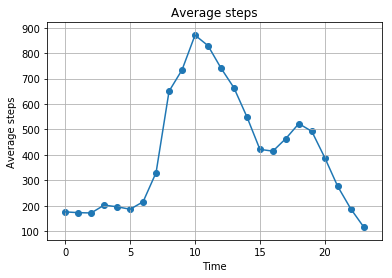

In [282]:
display_mean_plot(user2_df, 'hour')

**Conclusions:**

Aggregating by hour, steps build up until 10am, where it peaks at close to 1000 steps and drops until 3pm, where it rises until 6pm and falls again. For this user, their base level of activity seems to be around 200 (looking at midnight to 5am), which may be related to the time-block issue we saw before. We can potentially attribute those steps to the next hour that doesn't match the repeated step counts, or use it as a baseline or threshold for what constitutes as "active steps"

**F** 

A graphical representation of aggregation of number of steps taken per hour, segmented by day of week

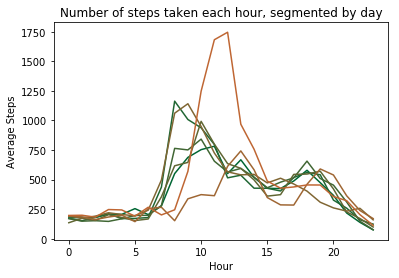

In [283]:
day_hour_aggs_2 = user2_df.groupby(["dayofweek","hour"], as_index=False)['Steps (count)'].agg('mean')
day_hour_aggs_2.columns = ["day of week", "hour", "steps"]
fig, ax = plt.subplots()
for i in range(7):
    daily_count_2 = day_hour_aggs_2[day_hour_aggs_2["day of week"] == i]
    ax.plot(daily_count_2["hour"],daily_count_2["steps"], color = [1/8 * i,0.4,0.2])

ax.set_xlabel("Hour")
ax.set_ylabel("Average Steps")
ax.set_title("Number of steps taken each hour, segmented by day")
plt.show()

**Conclusion**

We notice how there seems to be a consistent trend in step data, where it is bimodal in nature at specific times. Namely, from 7am to 12pm, and from tpm to 8pm. However, we note that there seems to an outlier on a particular day, in which User 2 walked more steps in average compared to other days. This would be of **particular** interest.

#### Identifying anomalous days of exercise

From human experience, we aren't always consistent with our walking. The goal here is to do some exploration and see if there are particular days which the user walked more in, and identify outliers in the data.

Here, we will sum up data over each month and plot the steps over time to see if there is a trend in more aggregated data.

**User 1**

Setting up a fresh dataframe for user 1

In [284]:
user1_df = user1_df.set_index('Start')
user1_df.head(5)

,Finish,Steps (count),year,month,week,day,dayofweek,hour
Start,,,,,,,,
2014-12-07 09:00:00,2014-12-07 10:00:00,941.0,2014,12,49,7,6,9
2014-12-07 10:00:00,2014-12-07 11:00:00,408.0,2014,12,49,7,6,10
2014-12-07 11:00:00,2014-12-07 12:00:00,157.0,2014,12,49,7,6,11
2014-12-07 12:00:00,2014-12-07 13:00:00,1017.0,2014,12,49,7,6,12
2014-12-07 13:00:00,2014-12-07 14:00:00,0.0,2014,12,49,7,6,13


**A**

We want to understand graphically if there are any particular months in which User 1 walked more frequently and extrapolate some information. For example, if during January they walked more, it could be due to New Years resolutions. 

Text(0.5, 1.0, 'Total steps taken per month over time (User1)')

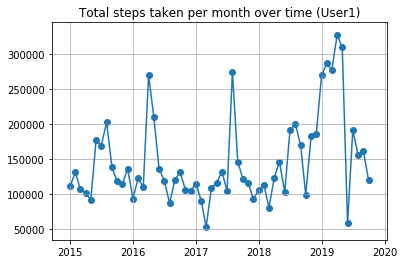

In [285]:
monthly_year_agg = user1_df.resample("M").sum()
plt.plot(monthly_year_agg.index, monthly_year_agg['Steps (count)'])
plt.scatter(monthly_year_agg.index, monthly_year_agg['Steps (count)'])
plt.grid()
plt.title("Total steps taken per month over time (User1)")

**Conclusions:**

Summing steps over the month, it seems like for the most part User1 was not very consistent in how they walked, with 3 peaks and one massive dip identified

**B**

We want to understand graphically if there are any particular weeks in which User 1 walked more frequently and extrapolate some information. For example, if they walked more in particular months, during a particular week, this could be signs of a routine.

Text(0.5, 1.0, 'Total steps taken per week over time (User1)')

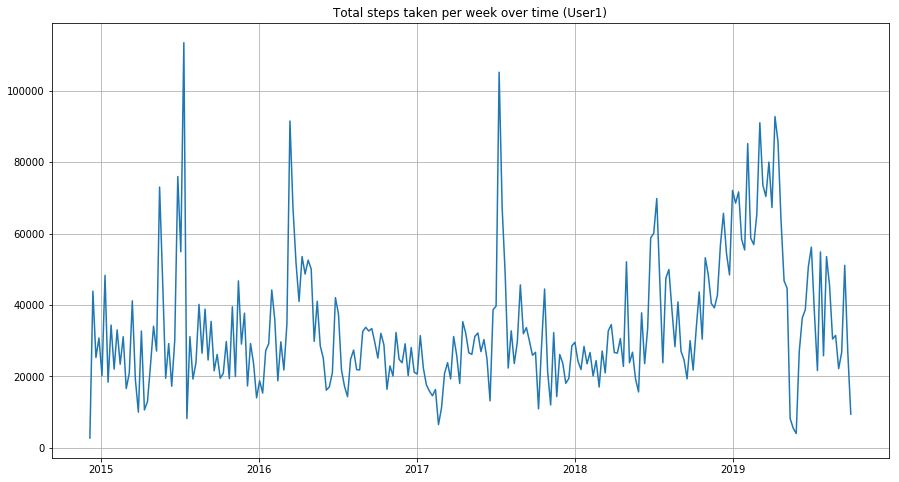

In [286]:
plt.figure(figsize=(15,8))
weekly_year_agg = user1_df.resample("W").sum()
plt.plot(weekly_year_agg.index, weekly_year_agg['Steps (count)'])

plt.grid()
plt.title("Total steps taken per week over time (User1)")

**Conclusions:**

Now there are definitely more outliers, around the start of 2016 and 2019, and at the middle of the years 2015, 2017, and 2018. These figures would definitely skew our average-based measures, so we may want to deal with these in some appropriate way.

**C**

We want to understand graphically if there are any particular days in which User 1 walked more frequently and extrapolate some information.  Our purpose is to determine what would be considered a reasonable amount of daily steps per day for this User, and minimise the impacts of outliers. By creating a seperate dataframe that can allow us to exclude outliers, this would help us provide a more statistically sound insight into the driving question of calculating step counts within a 10 hr period.

Text(0.5, 1.0, 'Total steps taken per day over time (User1)')

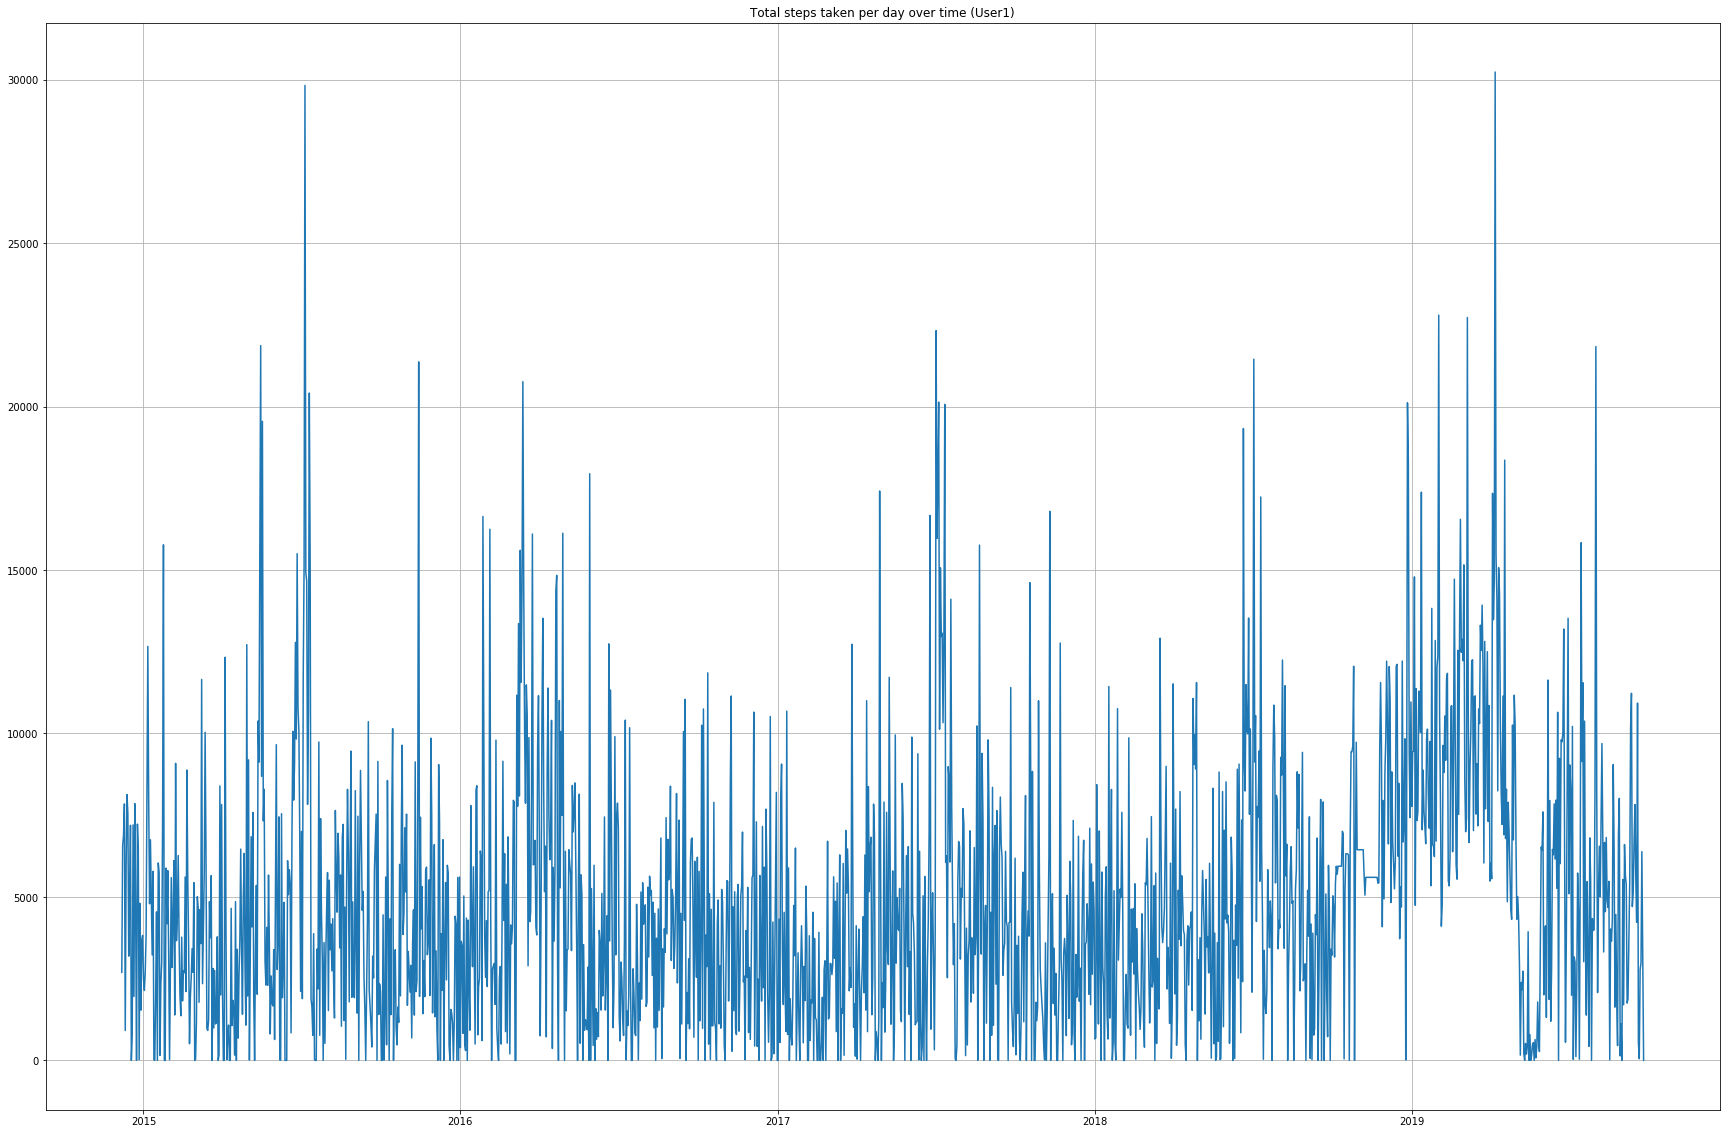

In [287]:
plt.figure(figsize=(30,20))
daily_year_agg = user1_df.resample("D").sum()
plt.plot(daily_year_agg.index, daily_year_agg['Steps (count)'])

plt.grid()
plt.title("Total steps taken per day over time (User1)")

**Conclusions:**

So this is aggregated daily step count for User 1, and some of the numbers start seeming a bit suss. E.g. At it's peak, there was 30,000 steps in one day, which translates to roughly 23km. Whilst not impossible (there are 30km walks you can do), it does seem to suggest that the person is very fit. 

**User 2**

Setting up a fresh dataframe for user 2

In [288]:
user2_df = user2_df.set_index('Start')
user2_df.head(5)

,Finish,Steps (count),year,month,week,day,dayofweek,hour
Start,,,,,,,,
2014-11-29 00:00:00,2014-11-29 01:00:00,502.666667,2014,11,48,29,5,0
2014-11-29 01:00:00,2014-11-29 02:00:00,502.666667,2014,11,48,29,5,1
2014-11-29 02:00:00,2014-11-29 03:00:00,502.666667,2014,11,48,29,5,2
2014-11-29 03:00:00,2014-11-29 04:00:00,502.666667,2014,11,48,29,5,3
2014-11-29 04:00:00,2014-11-29 05:00:00,502.666667,2014,11,48,29,5,4


**A**

We want to understand graphically if there are any particular months in which User 2 walked more frequently and extrapolate some information. For example, if during January they walked more, it could be due to New Years resolutions. 

Text(0.5, 1.0, 'Total steps taken per month over time (User2)')

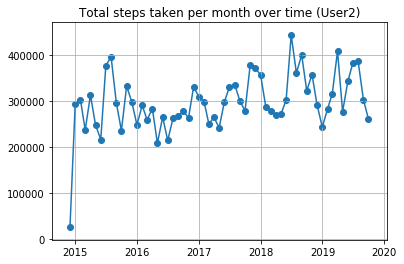

In [289]:
monthly_year_agg = user2_df.resample("M").sum()
plt.plot(monthly_year_agg.index, monthly_year_agg['Steps (count)'])
plt.scatter(monthly_year_agg.index, monthly_year_agg['Steps (count)'])
plt.grid()
plt.title("Total steps taken per month over time (User2)")

**Conclusions:**

Summing steps over the month, it seems like for the most part User2 was very consistent in how they walked, with a slight trend upwards as the years progressed. 


**B**

We want to understand graphically if there are any particular weeks in which User 2 walked more frequently and extrapolate some information. For example, if they walked more in particular months, during a particular week, this could be signs of a routine.

Text(0.5, 1.0, 'Total steps taken per week over time (User2)')

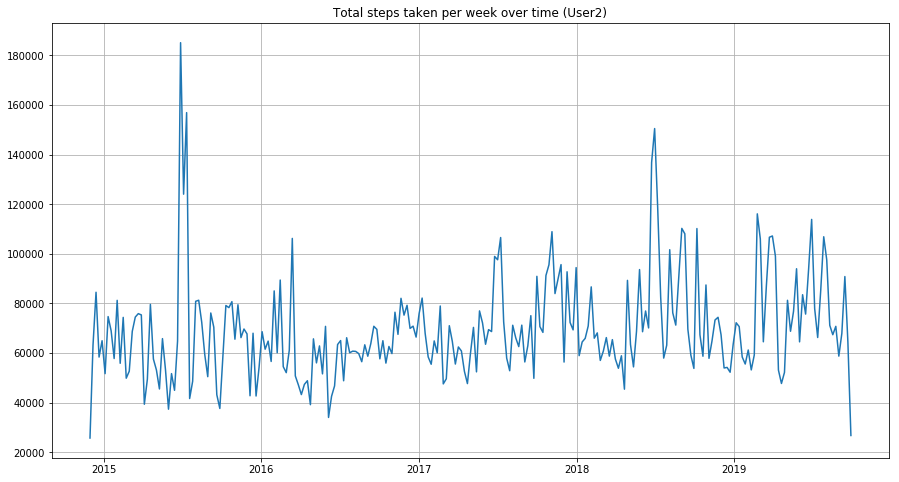

In [290]:
plt.figure(figsize=(15,8))
weekly_year_agg = user2_df.resample("W").sum()
plt.plot(weekly_year_agg.index, weekly_year_agg['Steps (count)'])

plt.grid()
plt.title("Total steps taken per week over time (User2)")

**Conclusions:**

Now there are definitely more outliers, around the middle of the years 2015, 2017, and 2018. These figures would definitely skew our average-based measures, so we may want to deal with these in some appropriate way.

**C**

We want to understand graphically if there are any particular days in which User 2 walked more frequently and extrapolate some information.  Our purpose is to determine what would be considered a reasonable amount of daily steps per day for this User, and minimise the impacts of outliers. By creating a seperate dataframe that can allow us to exclude outliers, this would help us provide a more statistically sound insight into the driving question of calculating step counts within a 10 hr period.

Text(0.5, 1.0, 'Total steps taken per day over time (User2)')

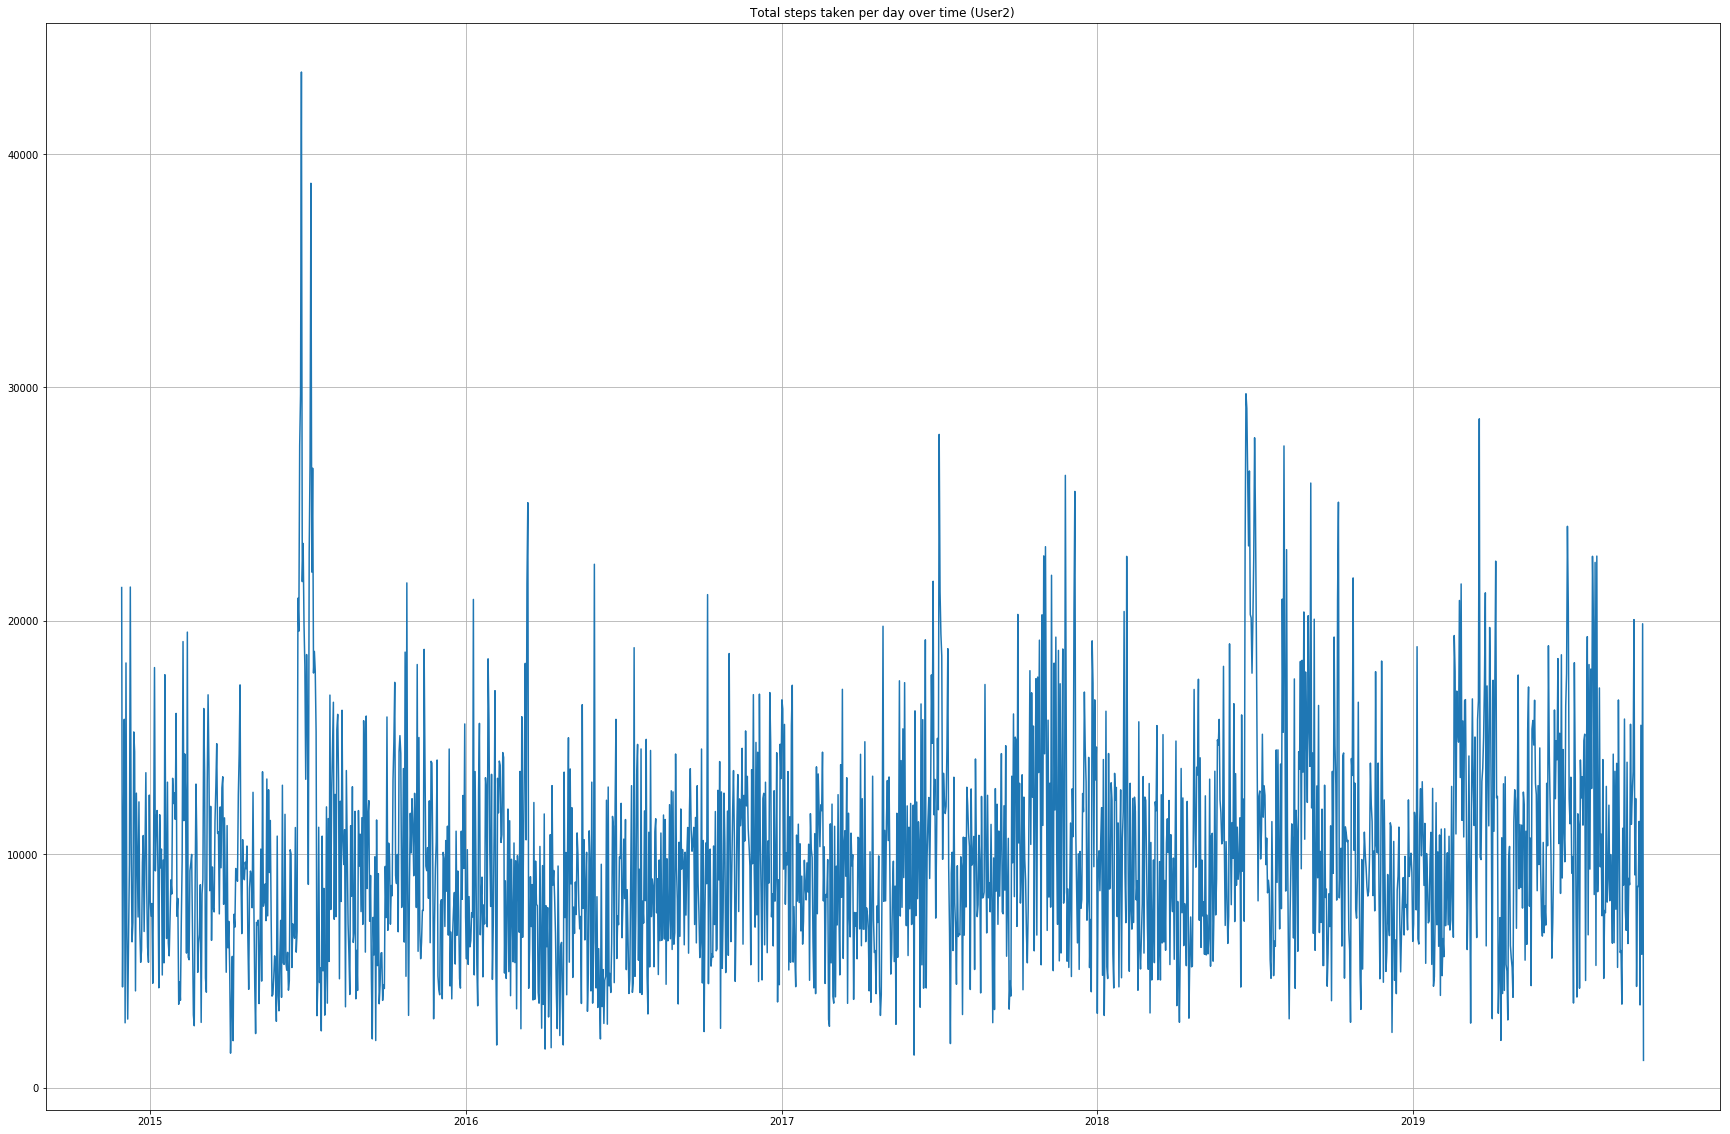

In [291]:
plt.figure(figsize=(30,20))
daily_year_agg = user2_df.resample("D").sum()
plt.plot(daily_year_agg.index, daily_year_agg['Steps (count)'])

plt.grid()
plt.title("Total steps taken per day over time (User2)")

**Conclusions:**

So this is aggregated daily step count for User 2, and some of the numbers start seeming a bit suss. E.g. At it's peak, there was 40,000 steps in one day, which translates to roughly 30km. Whilst not impossible (there are 30km walks you can do), it does seem to suggest that the person is very fit. 

**Final Remarks of this section:**

User1 definitely has a lower baseline of stepcount compared to User2 (our analysis has been correctly implemented). The seem to have picked up the steps from 2018 to 2019 (perhaps training for a 30k steps run?), but then sharply dropped off (injury?) for a few months. 